# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weatherofcities = []
query_url = url + "appid=" + api_key + "&q=" + cities[0]
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 131.25, 'lat': -0.86},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 302.334,
  'pressure': 1010.3,
  'humidity': 76,
  'temp_min': 302.334,
  'temp_max': 302.334,
  'sea_level': 1010.3,
  'grnd_level': 1003.19},
 'wind': {'speed': 0.81, 'deg': 216.927},
 'rain': {'3h': 2.062},
 'clouds': {'all': 11},
 'dt': 1570076875,
 'sys': {'message': 0.0057,
  'country': 'ID',
  'sunrise': 1570050037,
  'sunset': 1570093664},
 'timezone': 32400,
 'id': 1626542,
 'name': 'Sorong',
 'cod': 200}

In [4]:
#Create a Place to Log City Weather Data
City_1 = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Min_Temp = []
Wind_Speed = []

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weatherofcities = []
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #Collect City's Weather Data
        City_1.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Min_Temp.append(weather_json['main']['temp_min'])
        Wind_Speed.append(weather_json['wind']['speed'])
                               
        print(f"City name = {weather_json['name']} | City number = {weather_json['id']}.")
        
        
    except (KeyError, IndexError):
        print("City not found. Skipping....")
    
print (City_1)
print (Cloudiness)
print (Country)
print (Date)
print (Humidity)            
print (Lat)
print (Lng)
print (Max_Temp)
print (Min_Temp)
print (Wind_Speed)




City name = Sorong | City number = 1626542.
City name = Georgetown | City number = 3378644.
City not found. Skipping....
City name = Hofu | City number = 1862302.
City name = Mataura | City number = 6201424.
City name = Wakkanai | City number = 2127515.
City name = Novo Cruzeiro | City number = 3456070.
City not found. Skipping....
City name = Tura | City number = 2014833.
City name = Rikitea | City number = 4030556.
City name = Maple Creek | City number = 6065592.
City name = Mahebourg | City number = 934322.
City name = Ballina | City number = 2966778.
City not found. Skipping....
City name = Luhyny | City number = 702679.
City name = Port Hardy | City number = 6111862.
City not found. Skipping....
City name = Mar del Plata | City number = 3863379.
City name = Castro | City number = 3896218.
City name = Busselton | City number = 2075265.
City name = Praya | City number = 1630662.
City not found. Skipping....
City name = Hofn | City number = 2630299.
City name = Srednekolymsk | City n

City name = Kodinsk | City number = 1503037.
City name = Caxito | City number = 3451261.
City name = Taft | City number = 1684659.
City name = Melilla | City number = 3659139.
City name = Chandbali | City number = 1274761.
City name = Grimma | City number = 2917325.
City name = Pativilca | City number = 3932687.
City not found. Skipping....
City name = Nambucca Heads | City number = 2155858.
City not found. Skipping....
City name = Kununurra | City number = 2068110.
City name = Svetlaya | City number = 2015852.
City name = Tuatapere | City number = 2180815.
City name = Bosaso | City number = 64013.
City name = Upernavik | City number = 3418910.
City name = Sinnamary | City number = 3380290.
City name = Gat | City number = 2249901.
City name = Tautira | City number = 4033557.
City not found. Skipping....
City name = Longyearbyen | City number = 2729907.
City name = Knyaze-Volkonskoye | City number = 2021954.
City name = Champasak | City number = 1657819.
City name = Kysyl-Syr | City num

City name = Port Hedland | City number = 2063042.
City name = Kirishi | City number = 548442.
City name = Cururupu | City number = 3401148.
City name = Mazamari | City number = 3935102.
City name = Chernyshevskiy | City number = 2025456.
City name = Altamont | City number = 6065191.
City name = Zacatepec | City number = 3526992.
City name = Arman | City number = 2127060.
City not found. Skipping....
City name = Zalantun | City number = 2033225.
City name = Kirakira | City number = 2178753.
City name = Kaitangata | City number = 2208248.
City name = Entre Rios | City number = 3464100.
City not found. Skipping....
City name = Baker City | City number = 5712169.
City name = Norman Wells | City number = 6089245.
City name = Nioro | City number = 2413070.
City name = Salinopolis | City number = 3389822.
City name = Wajima | City number = 1848976.
City name = Kupang | City number = 2057087.
City name = Vallenar | City number = 3868633.
City name = Kuminskiy | City number = 1501429.
City not 

City name = Toora-Khem | City number = 1489401.
City not found. Skipping....
City name = Tasiilaq | City number = 3424607.
City name = Byron Bay | City number = 2172880.
City name = Mokhsogollokh | City number = 2019867.
City name = Abeche | City number = 245785.
City name = The Pas | City number = 6164499.
City name = Banjarmasin | City number = 1650213.
City name = Vila do Maio | City number = 3374120.
City not found. Skipping....
City name = Xiuyan | City number = 2033602.
City name = Berezovyy | City number = 2026786.
City name = Benghazi | City number = 88319.
City name = Bani | City number = 34915.
City name = Beloha | City number = 1067565.
City name = Atasu | City number = 1526041.
City name = Medea | City number = 2488835.
City not found. Skipping....
City name = Charagua | City number = 3921141.
City name = Atikokan | City number = 5888001.
City name = Laguna | City number = 3581398.
City name = Isangel | City number = 2136825.
City name = General Pico | City number = 3855075

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Data Frame with City Weather Data
CityWeatherdf = pd.DataFrame({'City' : City_1, 'Country': Country, 'Data' : Date, 'Cloudiness' : Cloudiness, 'Humidity' : Humidity , 'Latitude' : Lat, 'Longitude': Lng, 'Maximum Temperature' : Max_Temp, 'Minimum Temperature' : Min_Temp, 'Wind Speed' : Wind_Speed})
#Export CSV
CityWeatherdf.to_csv(r'CityWeatherdf.csv')
CityWeatherdf.head()

,City,Country,Data,Cloudiness,Humidity,Latitude,Longitude,Maximum Temperature,Minimum Temperature,Wind Speed
0,Sorong,ID,1570076875,11,76,-0.86,131.25,302.334,302.334,0.81
1,Georgetown,GY,1570076751,0,94,6.80,-58.16,298.150,298.150,1.70
2,Hofu,JP,1570076876,75,58,34.05,131.57,305.150,300.150,9.30
3,Mataura,NZ,1570076749,86,93,-46.19,168.86,281.480,281.480,1.79
4,Wakkanai,JP,1570076877,75,73,45.41,141.67,295.150,295.150,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

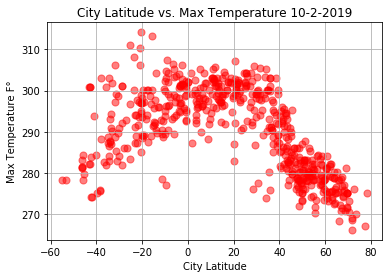

In [7]:
plt.scatter(CityWeatherdf['Latitude'], CityWeatherdf['Maximum Temperature'], s=50, color="red", alpha=0.5)
plt.title('City Latitude vs. Max Temperature 10-2-2019')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature F°')
plt.grid()
plt.savefig('CityLatitude_vs_Max Temperature_10-2-2019.png')

#### Latitude vs. Humidity Plot

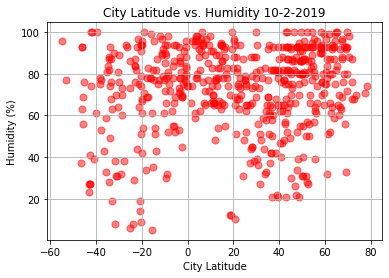

In [8]:
plt.scatter(CityWeatherdf['Latitude'], CityWeatherdf['Humidity'], s=50, color="red", alpha=0.5)
plt.title('City Latitude vs. Humidity 10-2-2019')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('CityLatitude_vs_Humidity_10-2-2019.png')



#### Latitude vs. Cloudiness Plot

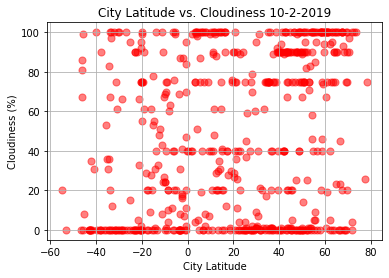

In [9]:
plt.scatter(CityWeatherdf['Latitude'], CityWeatherdf['Cloudiness'], s=50, color="red", alpha=0.5)
plt.title('City Latitude vs. Cloudiness 10-2-2019')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('CityLatitude_vs_Cloudiness_10-2-2019.png')

#### Latitude vs. Wind Speed Plot

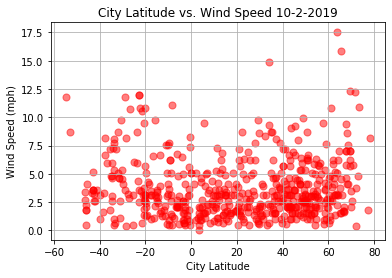

In [10]:
plt.scatter(CityWeatherdf['Latitude'], CityWeatherdf['Wind Speed'], s=50, color="red", alpha=0.5)
plt.title('City Latitude vs. Wind Speed 10-2-2019')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('CityLatitude_vs_WindSpeedmpg_10-2-2019.png')